## 1- importer les bibliothéques

In [11]:
import os
from PIL import Image
import numpy as np 
import pandas as pd
from skimage.io import imread
import matplotlib.pyplot as plt
import shutil
from sklearn.model_selection import cross_validate, train_test_split
from sklearn.metrics import make_scorer, recall_score, precision_score

import tensorflow as tf
import keras
from keras.models import Sequential
from keras.layers import Dense, Conv2D, Flatten, Dropout, MaxPooling2D, Activation, BatchNormalization
from keras.backend import dropout
from keras.layers.convolutional import Conv2D
from keras.layers.pooling import MaxPooling2D

from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import cross_val_score
from keras.optimizers import Adam
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import confusion_matrix
from sklearn.utils import resample

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


## 2- fixer les path des données augmenter 

In [12]:
sj_fliped='/kaggle/input/sjdata/DATA_(512,512)/augmented_data/sj_aug/sj_fliped'
sj_zoom='/kaggle/input/sjdata/DATA_(512,512)/augmented_data/sj_aug/sj_zoom'
sj_rotation='/kaggle/input/sjdata/DATA_(512,512)/augmented_data/sj_aug/sj_rotation'
sj_translation='/kaggle/input/sjdata/DATA_(512,512)/augmented_data/sj_aug/sj_translation'
sj_distortion='/kaggle/input/sjdata/DATA_(512,512)/augmented_data/sj_aug/sj_distortion'
sj_rot_trans_flip='/kaggle/input/sjdata/DATA_(512,512)/augmented_data/sj_aug/sj_fliped_rotation_translation'
sj_flip_distortion='/kaggle/input/sjdata/DATA_(512,512)/augmented_data/sj_aug/sj_fliped_distortion'
sj_rot_tran='/kaggle/input/sjdata/DATA_(512,512)/augmented_data/sj_aug/sj_rotation_translation'

nsj_fliped='/kaggle/input/sjdata/DATA_(512,512)/augmented_data/nsj_aug/nsj_fliped'
nsj_zoom='/kaggle/input/sjdata/DATA_(512,512)/augmented_data/nsj_aug/nsj_zoom'
nsj_rotation='/kaggle/input/sjdata/DATA_(512,512)/augmented_data/nsj_aug/nsj_rotation'
nsj_translation='/kaggle/input/sjdata/DATA_(512,512)/augmented_data/nsj_aug/nsj_translation'
nsj_distortion='/kaggle/input/sjdata/DATA_(512,512)/augmented_data/nsj_aug/nsj_distortion'
nsj_rot_trans_flip='/kaggle/input/sjdata/DATA_(512,512)/augmented_data/nsj_aug/nsj_fliped_rotation_translation'
nsj_flip_distortion='/kaggle/input/sjdata/DATA_(512,512)/augmented_data/nsj_aug/nsj_fliped_distortion'
nsj_rot_tran='/kaggle/input/sjdata/DATA_(512,512)/augmented_data/nsj_aug/nsj_rotation_translation'

In [13]:
sj_path='/kaggle/input/sjdata/DATA_(512,512)/sj_data'
nsj_path='/kaggle/input/sjdata/DATA_(512,512)/nsj_data'

## Mise en Forme des images

In [14]:

def mise_tenseur (path, nl, nc,pl):
    images_liste = os.listdir(path)
    images_liste.sort()
    Nb_images = len(images_liste)
    tenseur = np.empty((Nb_images, nl, nc, pl), dtype=np.uint8)
    k = 0
    for im in images_liste:
       
        img = imread(path+'/'+im)
        tenseur[k, :, :, 0] = img
        k +=1
    return(tenseur)

In [15]:
sj_original=mise_tenseur(sj_path,512,512,1)
nsj_original=mise_tenseur(nsj_path,512,512,1)

# Part2_with_aug_data

In [16]:
flipped_data= mise_tenseur(sj_fliped, 512,512,1)
zoom_data=mise_tenseur(sj_zoom,512,512,1)
rotate_data=mise_tenseur(sj_rotation,512,512,1)
translate_data=mise_tenseur(sj_translation,512,512,1)
distortion_data=mise_tenseur(sj_distortion,512,512,1)
flip_dist_data=mise_tenseur(sj_flip_distortion,512,512,1)
rot_trans_flip_data=mise_tenseur(sj_rot_trans_flip,512,512,1)


In [17]:
print(len(flipped_data),len(zoom_data),len(rotate_data),len(translate_data),len(distortion_data),len(flip_dist_data),len(rot_trans_flip_data))

115 230 230 230 230 230 460


In [18]:
sj_data = []
sj_data.extend(rotate_data)
sj_data.extend(flipped_data)
sj_data.extend(zoom_data)
sj_data.extend(translate_data)
sj_data.extend(distortion_data)
sj_data.extend(rot_trans_flip_data)
sj_data.extend(flip_dist_data)

In [19]:
len(sj_data)

1725

In [20]:
flipped_data_nsj= mise_tenseur(nsj_fliped,512,512,1)
zoom_data_nsj=mise_tenseur(nsj_zoom,512,512,1)
rotate_data_nsj=mise_tenseur(nsj_rotation,512,512,1)
translate_data_nsj=mise_tenseur(nsj_translation,512,512,1)
distortion_data_nsj=mise_tenseur(nsj_distortion,512,512,1)
flip_dist_data_nsj=mise_tenseur(nsj_flip_distortion,512,512,1)
rot_trans_flip_data_nsj=mise_tenseur(nsj_rot_trans_flip,512,512,1)


In [21]:
print(len(flipped_data_nsj),len(zoom_data_nsj),len(rotate_data_nsj),len(translate_data_nsj),len(distortion_data_nsj),len(flip_dist_data_nsj),len(rot_trans_flip_data_nsj))

110 220 220 220 220 220 440


In [22]:
nsj_data = []
nsj_data.extend(rotate_data_nsj)
nsj_data.extend(flipped_data_nsj)
nsj_data.extend(rot_trans_flip_data_nsj)
nsj_data.extend(zoom_data_nsj)
nsj_data.extend(distortion_data_nsj)
nsj_data.extend(translate_data_nsj)
nsj_data.extend(flip_dist_data_nsj)


In [23]:
len(nsj_data)

1650

In [24]:
labels1 = [0] * len(nsj_data)  # labels pour la première classe (0)
labels2 = [1] * len(sj_data)  # labels pour la deuxième classe (1)

# Fusionner les données et les labels en un seul tableau multidimensionnel
data = np.concatenate([nsj_data, sj_data])
print(len(data))
labels = np.concatenate([labels1, labels2])
len(labels)


3375


3375

In [25]:
x_train, x_test, y_train, y_test = train_test_split(data, labels, test_size=0.2, random_state=42)
# normaliser les données 
x_train = x_train.reshape(x_train.shape[0], 512,512, 1).astype('float32') / 255
x_test = x_test.reshape(x_test.shape[0], 512,512, 1).astype('float32') / 255

# cnn

In [26]:
model = Sequential()
model.add(Conv2D(32,(11,11),activation='relu', input_shape = (512,512,1)))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(32, kernel_size = (7,7),activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(32, kernel_size = (7,7),activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(16, kernel_size = (7,7),activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(16, kernel_size = (7,7),activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Flatten())
model.add(Dense(128,activation='relu'))
model.add(Dense(64,activation='relu'))
model.add(Dense(16, activation='relu'))
model.add(Dense(1,activation='sigmoid'))

print(model.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 502, 502, 32)      3904      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 251, 251, 32)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 245, 245, 32)      50208     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 122, 122, 32)     0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 116, 116, 32)      50208     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 58, 58, 32)       0

In [27]:
model.compile(optimizer=Adam(learning_rate=0.0001),loss=tf.keras.losses.binary_crossentropy,
              metrics=['accuracy'])

In [28]:
H2 = model.fit(x_train, y_train, validation_data= (x_test, y_test), epochs=50, batch_size=32)

Epoch 1/50
85/85 [==============================] - 21s 161ms/step - loss: 0.6577 - accuracy: 0.6011 - val_loss: 0.5877 - val_accuracy: 0.6874
Epoch 2/50
85/85 [==============================] - 11s 134ms/step - loss: 0.5226 - accuracy: 0.7233 - val_loss: 0.5348 - val_accuracy: 0.7244
Epoch 3/50
85/85 [==============================] - 11s 133ms/step - loss: 0.4202 - accuracy: 0.7989 - val_loss: 0.4007 - val_accuracy: 0.8341
Epoch 4/50
85/85 [==============================] - 12s 135ms/step - loss: 0.3237 - accuracy: 0.8537 - val_loss: 0.2976 - val_accuracy: 0.8637
Epoch 5/50
85/85 [==============================] - 11s 132ms/step - loss: 0.2241 - accuracy: 0.9085 - val_loss: 0.2284 - val_accuracy: 0.8978
Epoch 6/50
85/85 [==============================] - 11s 135ms/step - loss: 0.1728 - accuracy: 0.9259 - val_loss: 0.1612 - val_accuracy: 0.9289
Epoch 7/50
85/85 [==============================] - 12s 136ms/step - loss: 0.1224 - accuracy: 0.9544 - val_loss: 0.1112 - val_accuracy: 0.9541

22/22 [==============================] - 1s 47ms/step


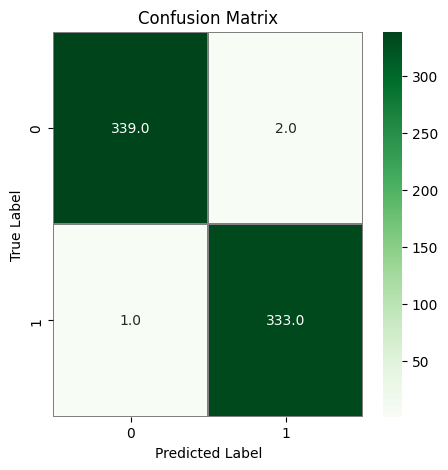

[[339   2]
 [  1 333]]


In [29]:
import seaborn as sns
# Générer des prédictions sur l'ensemble de test
y_pred = model.predict(x_test)
y_pred_classes = np.where(y_pred>0.5,1.,0)

# Calculer la matrice de confusion
cm = confusion_matrix(y_true=y_test, y_pred=y_pred_classes)
f,ax = plt.subplots(figsize=(5,5))
sns.heatmap(cm, annot=True, linewidths=0.01,cmap="Greens",linecolor="gray", fmt= '.1f',ax=ax)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()
print(cm)

## Matrice de confusion de train


In [30]:
print(classification_report(y_test, y_pred_classes))

              precision    recall  f1-score   support

           0       1.00      0.99      1.00       341
           1       0.99      1.00      1.00       334

    accuracy                           1.00       675
   macro avg       1.00      1.00      1.00       675
weighted avg       1.00      1.00      1.00       675



In [31]:

# Calculez la sensibilité, la spécificité, le FPR et le FNR à partir de la matrice de confusion
TN, FP, FN, TP = cm.ravel()
sensitivity = TP / (TP + FN)
specificity = TN / (TN + FP)
FPR = FP / (FP + TN)
FNR = FN / (FN + TP)

# Calculez le LR+ et le LR- à partir de la sensibilité et de la spécificité
lr_plus = sensitivity / (1 - specificity)
lr_minus = (1 - sensitivity) / specificity

# Afficher les résultats
print("Matrice de confusion : ")
print(cm)
print("Sensibilité (TPR) : ", sensitivity)
print("Spécificité (TNR) : ", specificity)
print("Faux positifs (FPR) : ", FPR)
print("Faux négatifs (FNR) : ", FNR)
print("Rapport de vraisemblance positive (LR+) : ", lr_plus)
print("Rapport de vraisemblance négative (LR-) : ", lr_minus)

Matrice de confusion : 
[[339   2]
 [  1 333]]
Sensibilité (TPR) :  0.9970059880239521
Spécificité (TNR) :  0.9941348973607038
Faux positifs (FPR) :  0.005865102639296188
Faux négatifs (FNR) :  0.0029940119760479044
Rapport de vraisemblance positive (LR+) :  169.989520958084
Rapport de vraisemblance négative (LR-) :  0.0030116757635171815


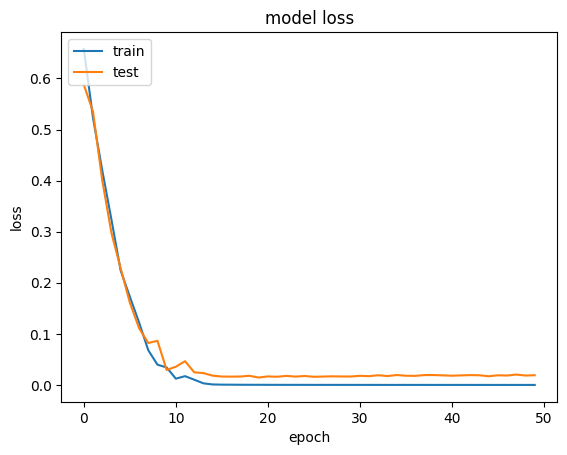

In [32]:
#loss
plt.plot(H2.history['loss'])
plt.plot(H2.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

## Matrice de confusion de test


In [33]:
# diviser la base en 2
nsj_org_data=nsj_original
sj_org_data=sj_original
label_nsj = [0] * len(nsj_org_data)  # labels pour la première classe (0)
label_sj = [1] * len(sj_org_data)  # labels pour la deuxième classe (1)
# Fusionner les données et les labels en un seul tableau multidimensionnel
data2 = np.concatenate([nsj_org_data, sj_org_data])
print(len(data2))
labels2 = np.concatenate([label_nsj, label_sj])
len(labels2)


225


225

In [34]:
x_data= data2.reshape(data2.shape[0], 512,512, 1).astype('float32') / 255

8/8 [==============================] - 1s 56ms/step


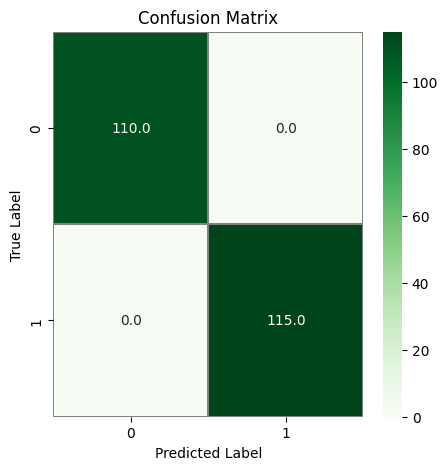

[[110   0]
 [  0 115]]


In [35]:
y_pred2 = model.predict(x_data)
y_pred_classes2 = np.where(y_pred2>0.5,1.,0)

# Calculer la matrice de confusion
cm = confusion_matrix(y_true=labels2, y_pred=y_pred_classes2)
f,ax = plt.subplots(figsize=(5,5))
sns.heatmap(cm, annot=True, linewidths=0.01,cmap="Greens",linecolor="gray", fmt= '.1f',ax=ax)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()
print(cm)

In [36]:
model.save('ModelSjogren.h5') 